<a href="https://colab.research.google.com/github/prisha2916/Sustainability-Mapping-Case-Competition/blob/main/IlliniImpactCaseCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains most of our python code. We have shown some scrapping of one of the website to get the raw data. We have also performed some data exploration and created some visualizations just to understand the data we had. We haven't used these visualizations in the report.

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://courses.illinois.edu/schedule/2023/fall'

try:
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        subject_links = soup.select('td a')

        total_courses = 0
        for link in subject_links:
            if link.parent.name == 'td':
                total_courses += 1

        print("Total number of courses:", total_courses)
    else:
        print("Failed to retrieve webpage. Status code:", response.status_code)

except Exception as e:
    print("An error occurred:", e)


Total number of courses: 188


In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

url = 'https://courses.illinois.edu/schedule/2023/fall'

try:
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        subject_links = soup.select('td a')

        total_entries = 0

        for link in subject_links:
            subject_url = urljoin(url, link['href'])

            subject_response = requests.get(subject_url)

            if subject_response.status_code == 200:
                subject_soup = BeautifulSoup(subject_response.text, 'html.parser')

                table = subject_soup.find('table')

                rows = table.find_all('tr')[1:]

                total_entries += len(rows)

        print("Total number of entries in all tables under subject hyperlinks:", total_entries)
    else:
        print("Failed to retrieve webpage. Status code:", response.status_code)

except Exception as e:
    print("An error occurred:", e)


Total number of entries in all tables under subject hyperlinks: 4505


In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def count_table_rows(table):
    rows = table.find_all('tr')
    return len(rows) - 1

url = 'https://courses.illinois.edu/schedule/2023/fall'

try:
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        first_subject_link = soup.select_one('td a')

        subject_url = urljoin(url, first_subject_link['href'])

        subject_response = requests.get(subject_url)

        if subject_response.status_code == 200:
            subject_soup = BeautifulSoup(subject_response.text, 'html.parser')

            main_table = subject_soup.find('table', class_='table')

            num_entries = count_table_rows(main_table)

            print("Number of entries for the first subject hyperlink:", num_entries)
        else:
            print("Failed to retrieve webpage for the first subject. Status code:", subject_response.status_code)

    else:
        print("Failed to retrieve webpage. Status code:", response.status_code)

except Exception as e:
    print("An error occurred:", e)


Number of entries for the first subject hyperlink: 16


In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

url = 'https://courses.illinois.edu/schedule/2020/fall'

try:
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        subject_links = soup.select('td a')

        data = []

        for link in subject_links:
            subject_url = urljoin(url, link['href'])

            subject_response = requests.get(subject_url)

            if subject_response.status_code == 200:
                subject_soup = BeautifulSoup(subject_response.text, 'html.parser')

                table = subject_soup.find('table')

                df = pd.read_html(str(table))[0]  # Assuming the first table on the page is the one we want

                data.append(df)

        combined_df = pd.concat(data, ignore_index=True)

        combined_df.to_csv('course_data.csv', index=False)

        print("Data saved as course_data.csv")

    else:
        print("Failed to retrieve webpage. Status code:", response.status_code)

except Exception as e:
    print("An error occurred:", e)


Data saved as course_data.csv


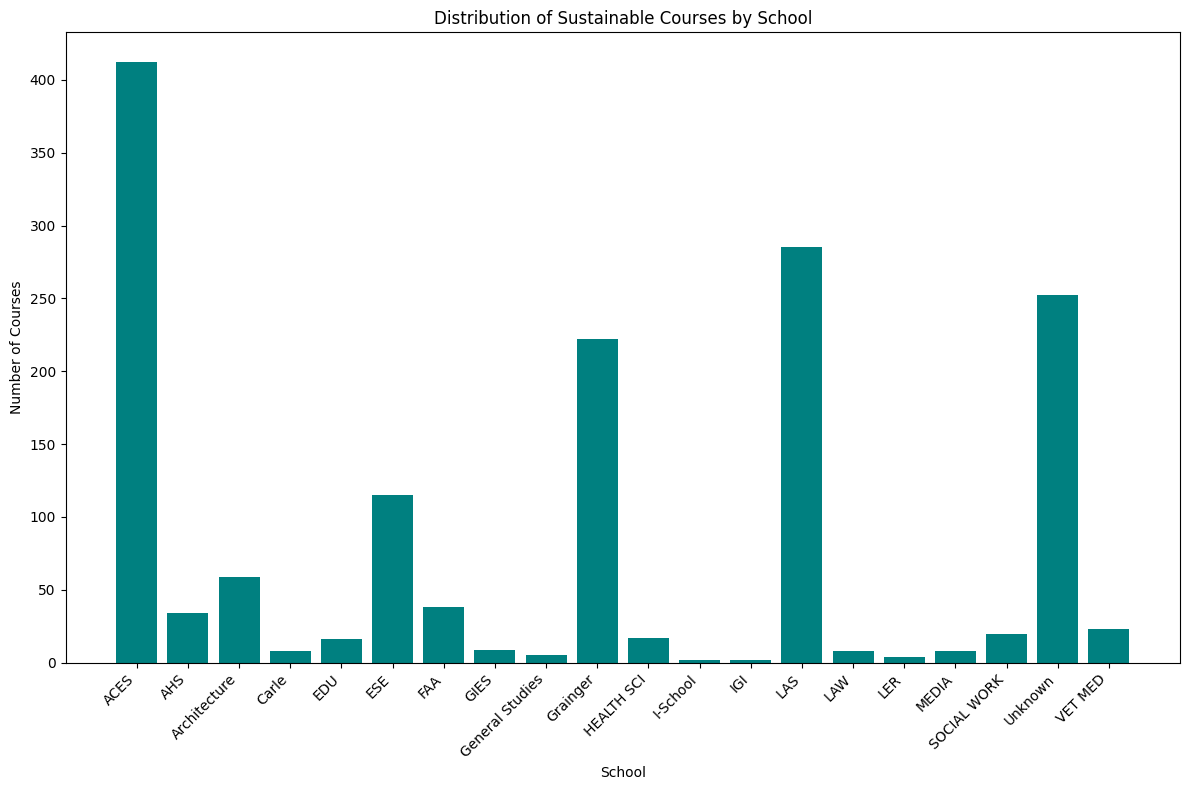

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('mapped_dataset.csv')

sustainability_courses = df[df['Type'] == 'Sustainability']

pivot_table = sustainability_courses.groupby(['School']).size().reset_index(name='Course Count')

plt.figure(figsize=(12, 8))
plt.bar(pivot_table['School'], pivot_table['Course Count'], color='teal')
plt.title('Distribution of Sustainable Courses by School')
plt.xlabel('School')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


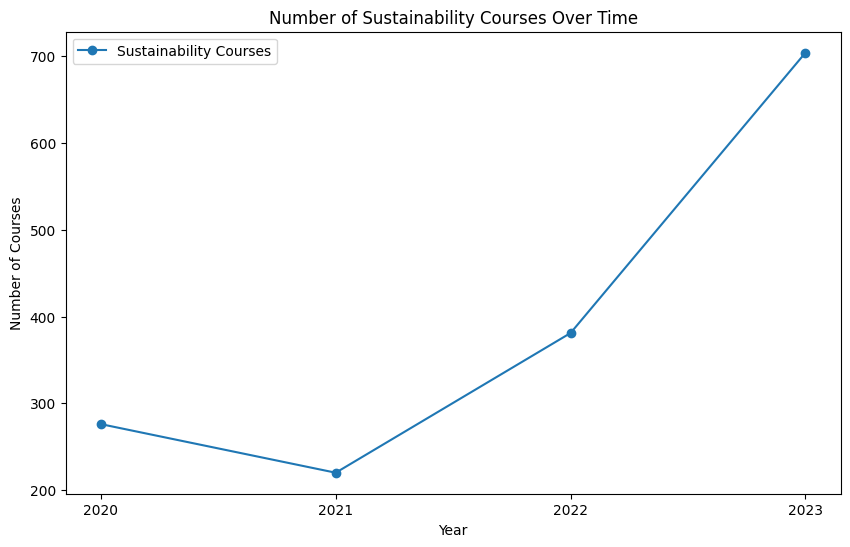

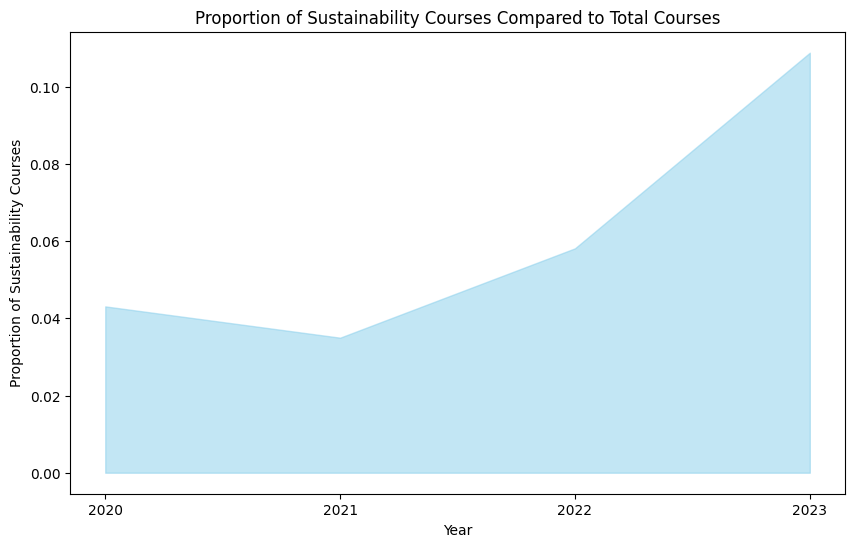

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('IlliniImpactDatasetFinal.csv')  # Replace 'your_dataset.csv' with the actual filename

sustainability_courses = df[df['Type'] == 'Sustainability']

sustainability_by_year = sustainability_courses.groupby('Year').size()

total_courses_by_year = df.groupby('Year').size()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sustainability_by_year.index, sustainability_by_year.values, marker='o', label='Sustainability Courses')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Courses')
ax.set_title('Number of Sustainability Courses Over Time')

ax.set_xticks(sustainability_by_year.index.astype(int))

ax.legend()

plt.show()


proportion_sustainability = sustainability_by_year / total_courses_by_year

fig, ax = plt.subplots(figsize=(10, 6))

ax.fill_between(proportion_sustainability.index, proportion_sustainability.values, color='skyblue', alpha=0.5)

ax.set_xlabel('Year')
ax.set_ylabel('Proportion of Sustainability Courses')
ax.set_title('Proportion of Sustainability Courses Compared to Total Courses')

ax.set_xticks(proportion_sustainability.index.astype(int))

plt.show()


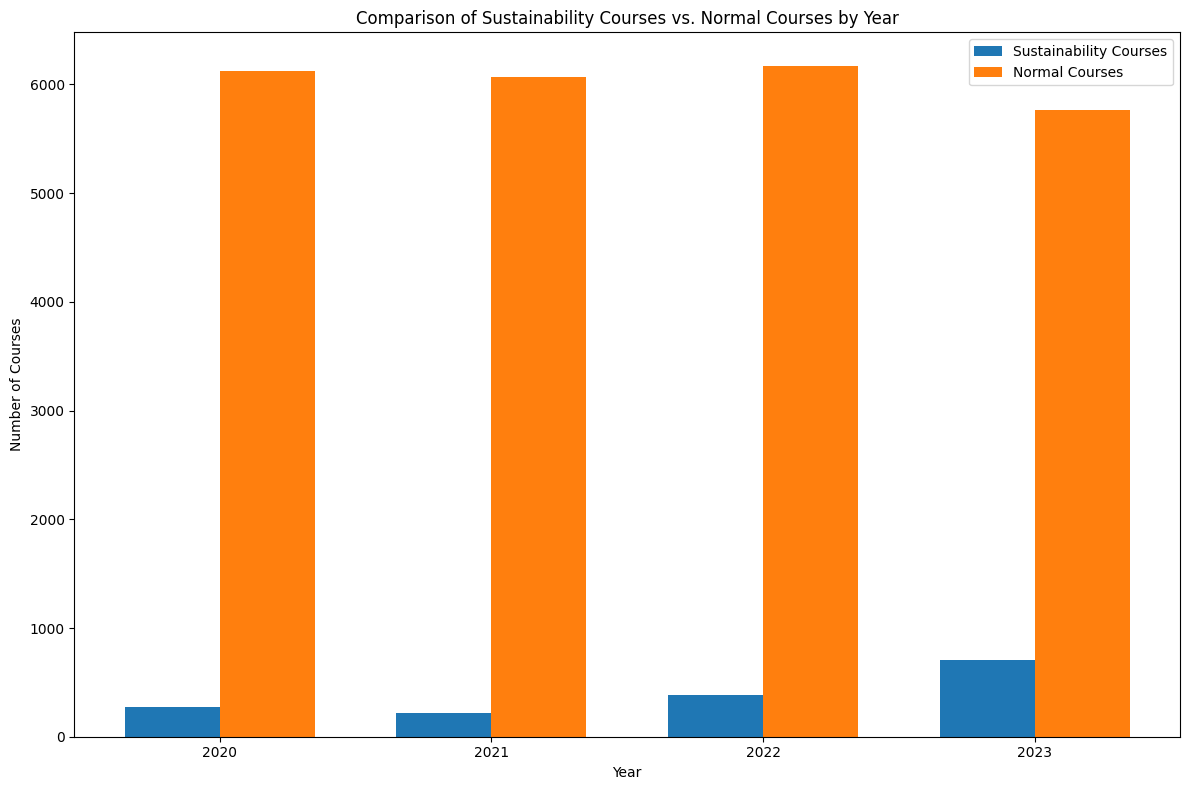

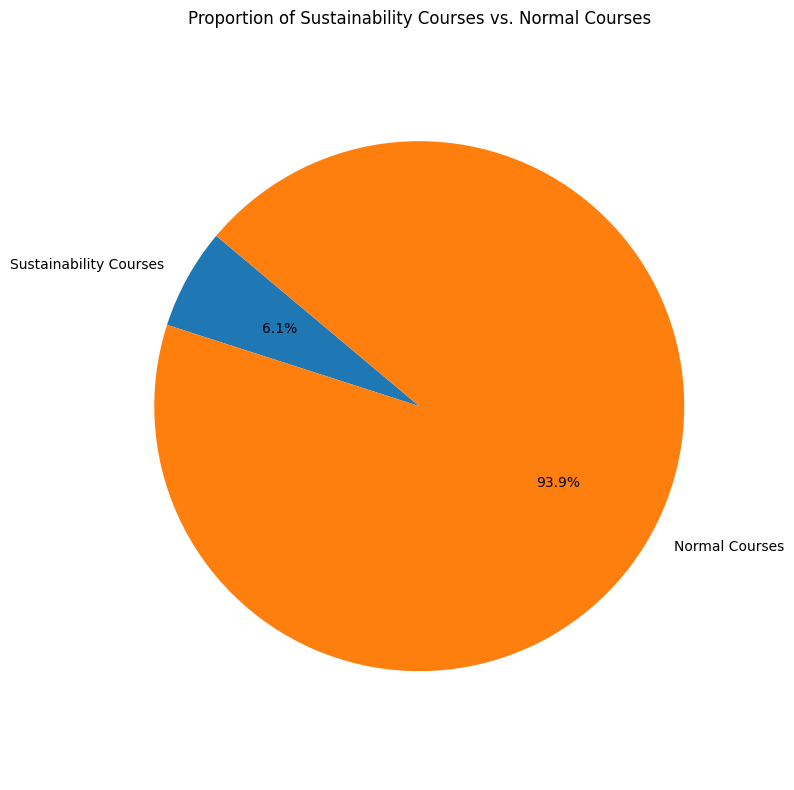

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('IlliniImpactDatasetFinal.csv')  # Replace 'your_dataset.csv' with the actual filename

sustainability_courses = df[df['Type'] == 'Sustainability']
normal_courses = df[df['Type'] == 'Regular']

sustainability_by_year = sustainability_courses.groupby('Year').size().reset_index(name='Sustainability Courses')
normal_by_year = normal_courses.groupby('Year').size().reset_index(name='Normal Courses')

merged_df = pd.merge(sustainability_by_year, normal_by_year, on='Year', how='outer').fillna(0)

plt.figure(figsize=(12, 8))
bar_width = 0.35
index = merged_df.index
plt.bar(index, merged_df['Sustainability Courses'], bar_width, label='Sustainability Courses')
plt.bar(index + bar_width, merged_df['Normal Courses'], bar_width, label='Normal Courses')
plt.xlabel('Year')
plt.ylabel('Number of Courses')
plt.title('Comparison of Sustainability Courses vs. Normal Courses by Year')
plt.xticks(index + bar_width / 2, merged_df['Year'])
plt.legend()
plt.tight_layout()
plt.show()

total_sustainability = sustainability_courses.shape[0]
total_normal = normal_courses.shape[0]
labels = ['Sustainability Courses', 'Normal Courses']
sizes = [total_sustainability, total_normal]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sustainability Courses vs. Normal Courses')
plt.axis('equal')
plt.tight_layout()
plt.show()


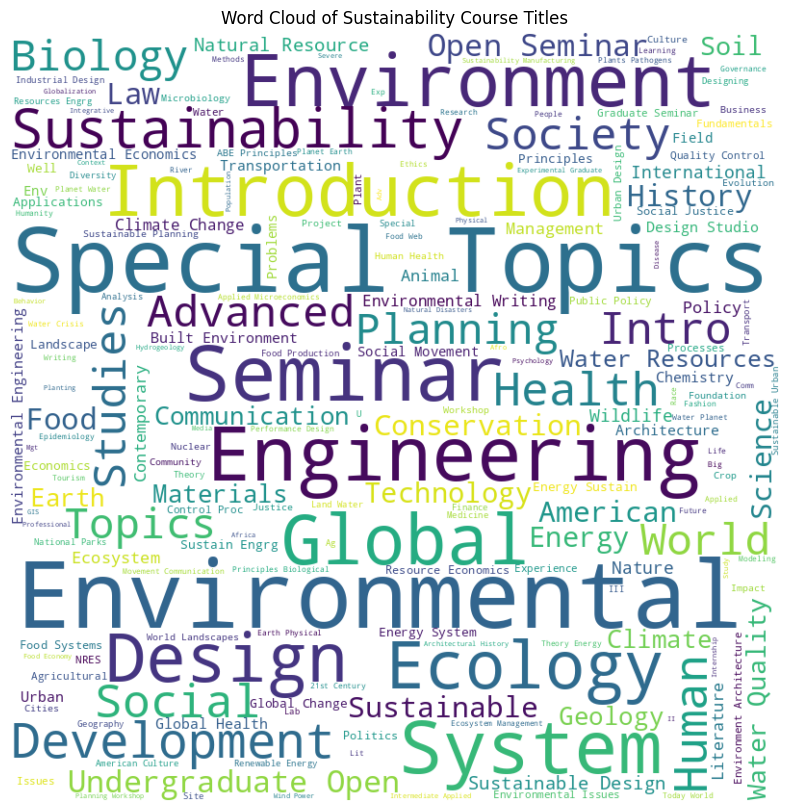

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sustainability_titles = df[df['Type'] == 'Sustainability']['Subject Name']

text = ' '.join(sustainability_titles)

wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis', contour_color='steelblue', contour_width=2, mask=None).generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sustainability Course Titles')
plt.show()


<ipython-input-53-d96c0d4a6813>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Course Count', y='School', data=top_schools, palette='viridis')


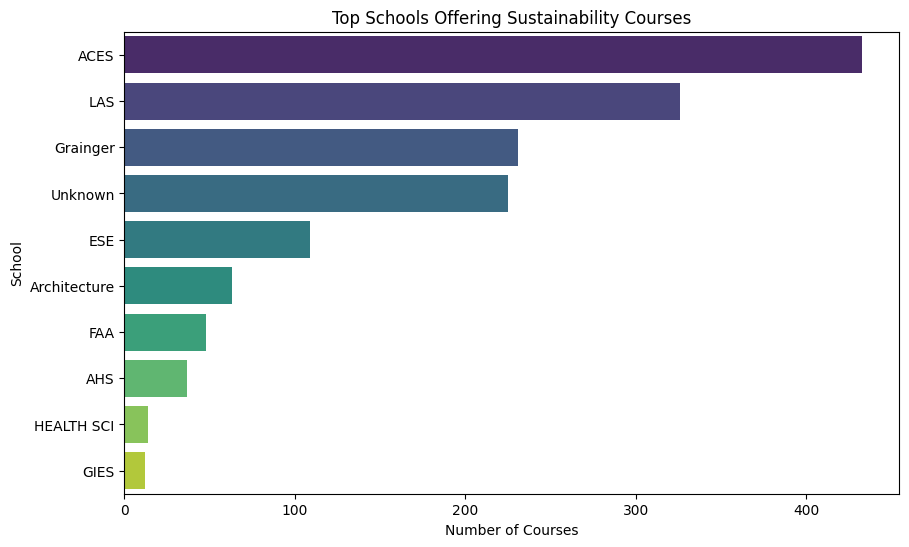

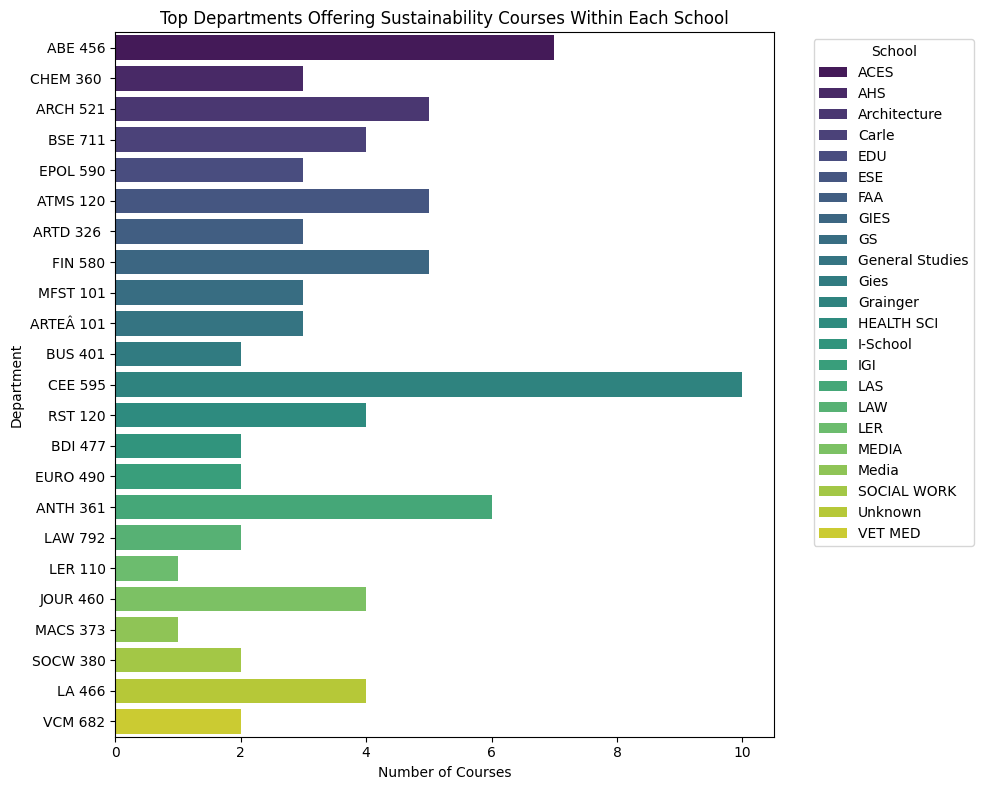

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('IlliniImpactDatasetFinal.csv')

sustainability_courses = df[df['Type'] == 'Sustainability']

sustainability_by_school = sustainability_courses.groupby('School').size().reset_index(name='Course Count')

top_schools = sustainability_by_school.nlargest(10, 'Course Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Course Count', y='School', data=top_schools, palette='viridis')
plt.title('Top Schools Offering Sustainability Courses')
plt.xlabel('Number of Courses')
plt.ylabel('School')
plt.show()

sustainability_by_department = sustainability_courses.groupby(['School', 'Code']).size().reset_index(name='Course Count')

top_departments_by_school = sustainability_by_department.loc[sustainability_by_department.groupby('School')['Course Count'].idxmax()]

plt.figure(figsize=(10, 8))
sns.barplot(x='Course Count', y='Code', hue='School', data=top_departments_by_school, palette='viridis')
plt.title('Top Departments Offering Sustainability Courses Within Each School')
plt.xlabel('Number of Courses')
plt.ylabel('Department')
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
